In [40]:
import numpy as np
import csv
import png
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [27, 14]
mpl.rcParams['figure.dpi'] = 72
from matplotlib import pyplot as plt
import cv2 as cv
from functions import *

Load flat image

In [41]:
num_images = 19
ampl = load_n_undistort("../data/ToFData/ampl_flat_roof_diffusor_16.txt")
width, height, channels = ampl.shape
radial_arr = np.zeros((width, height, channels, num_images),dtype=float)
filenameprefix = "../data/ToFData/radial_flat_roof_diffusor_"
filenamesuffix = ".txt"
for i in range(num_images):
    filename = filenameprefix+str(i)+filenamesuffix
    radial_arr[:,:,:,i] = load_n_undistort(filename)
    radial_arr[:,:,:,i] = cv.GaussianBlur(radial_arr[:,:,:,i],(0,0),3)
radial = np.mean(radial_arr, axis=3)

It's a cos-Function...

(205, 265, 3)


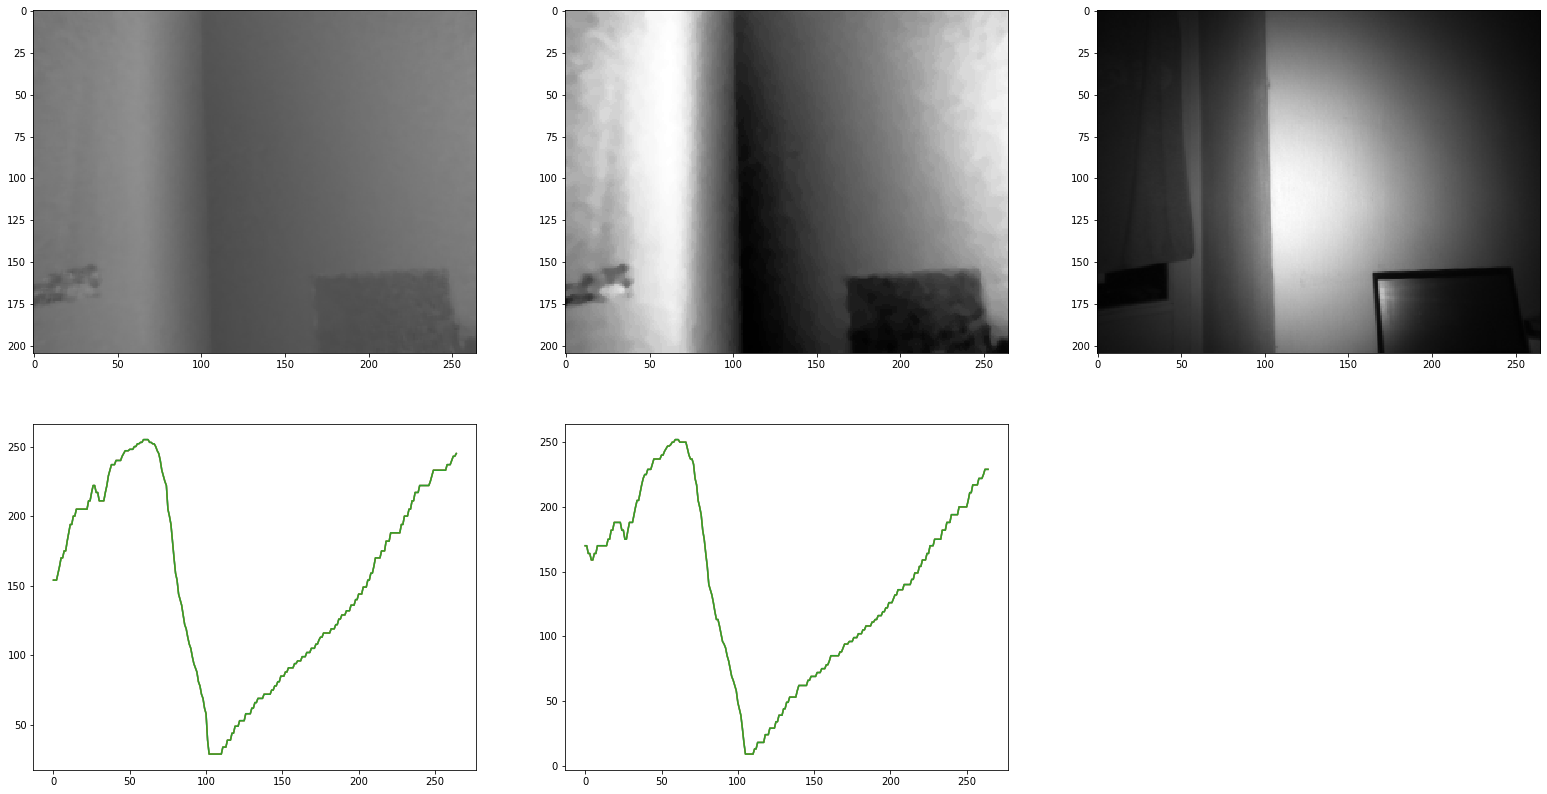

In [42]:
radial_1 = load_n_undistort("../data/ToFData/radial_test_diffusor_5.txt")
ampl_1 = load_n_undistort("../data/ToFData/ampl_test_diffusor_5.txt")
if len(radial.shape)==3:
    width, height, channels = radial.shape
elif len(radial.shape)==2:
    width, height = radial.shape
    channels = 1

cos_a = np.zeros(radial.shape,dtype=float)
print(radial.shape)
for c in range(channels):
    for m in range(width):
        for n in range(height):
            cos_a[m,n,c] = radial[102,132,c]/radial[m,n,c]
flattened = mul_images_2D(radial_1,cos_a)
flat_int = np.zeros(flattened.shape,dtype=np.uint8)
for c in range(channels):
    for m in range(width):
        for n in range(height):
            flat_int[m,n,c] = np.uint8(flattened[m,n,c]*255)

flat_histoeq = np.zeros(flattened.shape,dtype=np.uint8)
flat_histoeq[:,:,0] = cv.equalizeHist(flat_int[:,:,0])
flat_histoeq[:,:,1] = cv.equalizeHist(flat_int[:,:,1])
flat_histoeq[:,:,2] = cv.equalizeHist(flat_int[:,:,2])
flat_histoeq = cv.medianBlur(flat_histoeq,5)

plt.subplot(231)
plt.imshow(flattened, interpolation='nearest')
plt.subplot(232)
plt.imshow(flat_histoeq, interpolation='nearest')
plt.subplot(233)
plt.imshow(ampl_1, interpolation='nearest')
plt.subplot(234)
plt.plot(flat_histoeq[50,:])
plt.subplot(235)
plt.plot(flat_histoeq[105,:])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


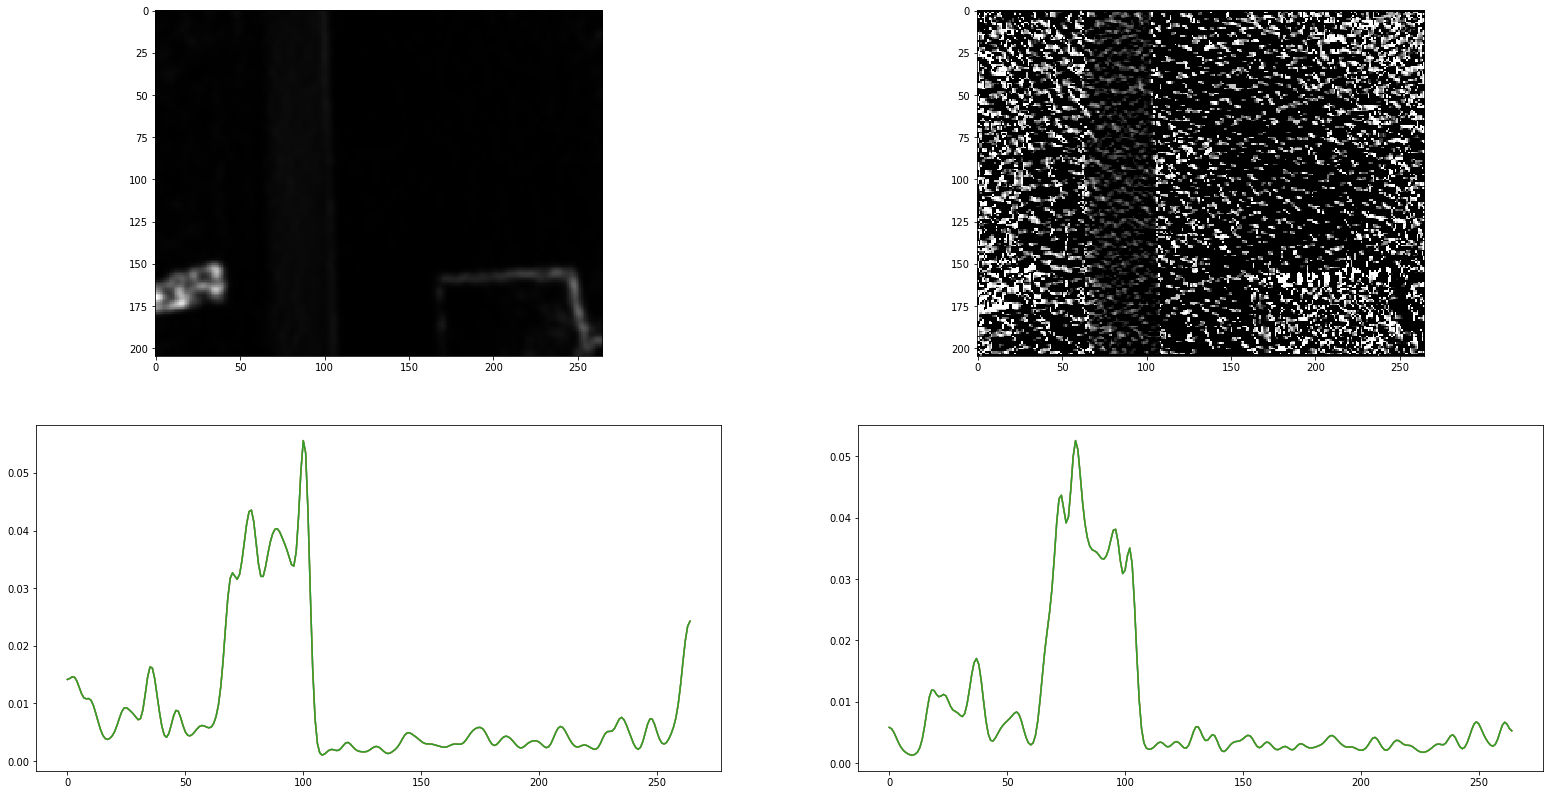

In [43]:
sobel1, ori = sobel_filter_2D(flat_int)
sobel1 = cv.GaussianBlur(sobel1,(0,0),2)
sobel1 = boost_image_2D(sobel1)
ori = cv.GaussianBlur(ori,(0,0),2)
ori = boost_image_2D(ori)
plt.subplot(221)
plt.imshow(sobel1[:,:], interpolation='nearest')
plt.subplot(222)
plt.imshow(ori, interpolation='nearest')
plt.subplot(223)
plt.plot(sobel1[50,:])
plt.subplot(224)
plt.plot(sobel1[100,:])
plt.show()

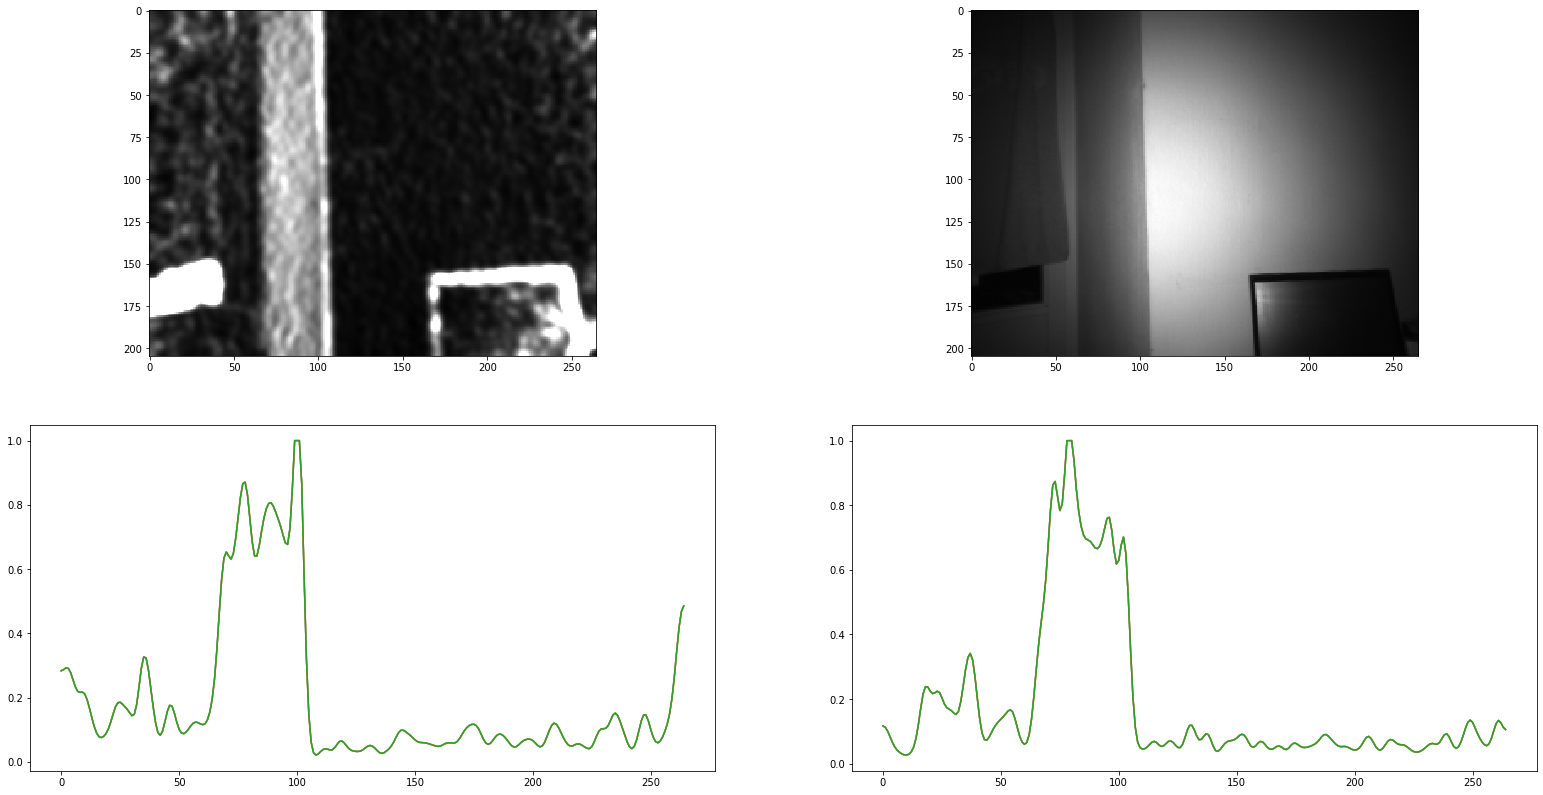

In [44]:
sobel_2 = np.zeros(sobel1.shape,dtype=float)
for c in range(channels):
    for m in range(width):
        for n in range(height):
            sobel_2[m,n,c] = sobel1[m,n,c]*20
            if sobel_2[m,n,c]>1:
                sobel_2[m,n,c]=1
plt.subplot(221)
plt.imshow(sobel_2[:,:], interpolation='nearest')
plt.subplot(222)
plt.imshow(ampl_1, interpolation='nearest')
plt.subplot(223)
plt.plot(sobel_2[50,:])
plt.subplot(224)
plt.plot(sobel_2[100,:])
plt.show()

num=26806
num=5517
num=27084
num=12029


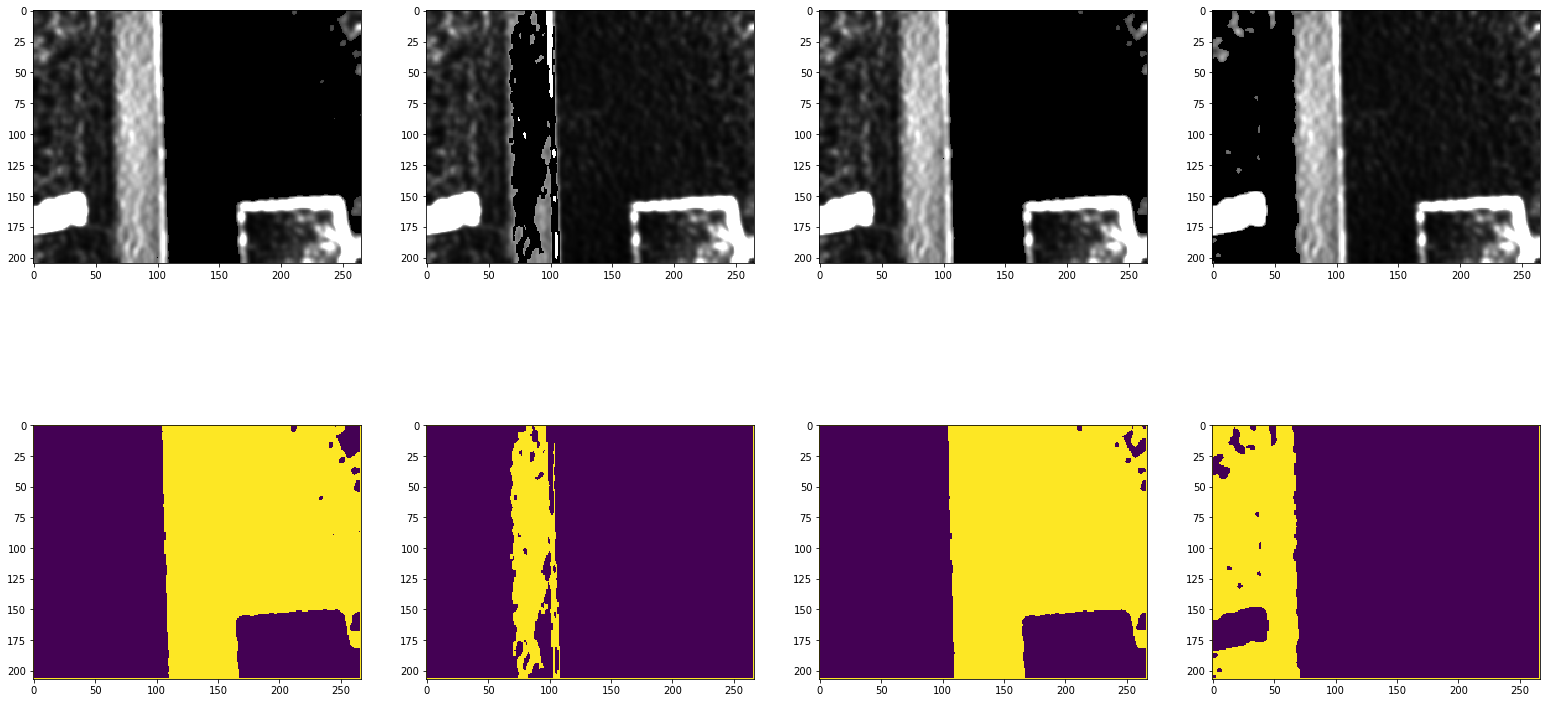

In [45]:
res6, mask6 = fillArea(200,100,sobel_2,50)
res7, mask7= fillArea(75,100,sobel_2,50)
res8, mask8 = fillArea(120,100,sobel_2,50)
res9, mask9 = fillArea(0,0,sobel_2,50)
plt.subplot(241)
plt.imshow(res6, interpolation='nearest')
plt.subplot(242)
plt.imshow(res7, interpolation='nearest')
plt.subplot(243)
plt.imshow(res8, interpolation='nearest')
plt.subplot(244)
plt.imshow(res9, interpolation='nearest')
plt.subplot(245)
plt.imshow(mask6, interpolation='nearest')
plt.subplot(246)
plt.imshow(mask7, interpolation='nearest')
plt.subplot(247)
plt.imshow(mask8, interpolation='nearest')
plt.subplot(248)
plt.imshow(mask9, interpolation='nearest')
plt.show()

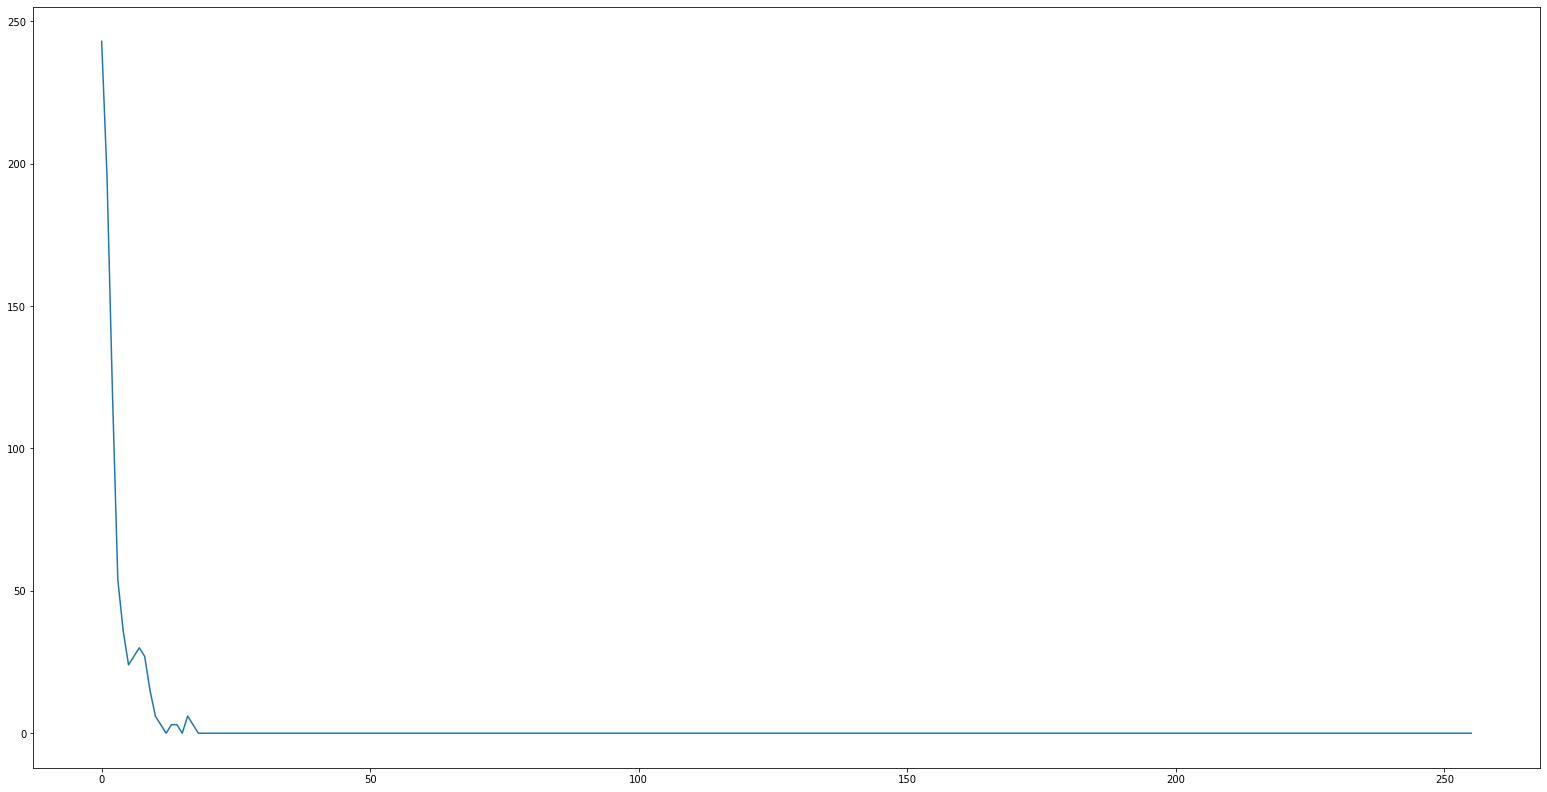

In [46]:
sobel1_int = np.zeros(flattened.shape,dtype=np.uint8)
for c in range(channels):
    for m in range(width):
        for n in range(height):
            sobel1_int[m,n,c] = np.uint8(sobel1[m,n,c]*255)

hist = cv.calcHist(sobel1_int,[0],None,[256],(0,256),accumulate=False)
plt.plot(hist)
plt.show()

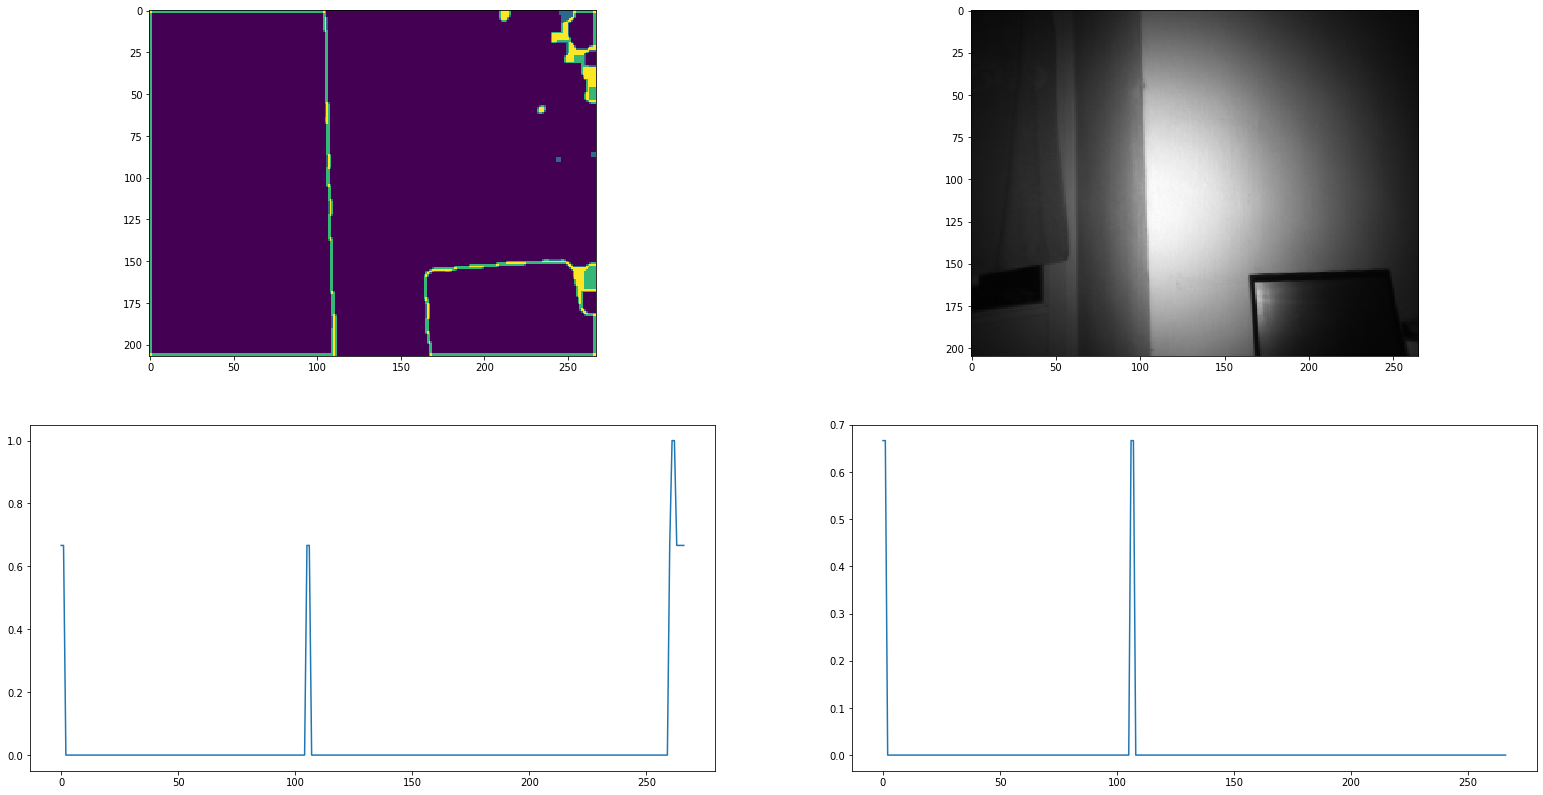

In [47]:
lines = findDominantLine(mask6)

plt.subplot(221)
plt.imshow(lines[:,:], interpolation='nearest')
plt.subplot(222)
plt.imshow(ampl_1, interpolation='nearest')
plt.subplot(223)
plt.plot(lines[50,:])
plt.subplot(224)
plt.plot(lines[100,:])
plt.show()